<a href="https://colab.research.google.com/github/themanoftalent/pyt-colab/blob/master/IMDB_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB Dataset Data Analysis 
All in all data is taken from the Kaggle

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.express as pltex
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
from google.colab import files
uploaded=files.upload()

In [164]:
imdb = pd.read_csv("IMDB-Movie-Data.csv",sep=',')
imdb.head(6)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0


____

#Lets describe the dataset

In [165]:
imdb.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,1000.0,500.500000,288.819436,1.0,250.75,500.500,750.250,1000.00
Year,1000.0,2012.783000,3.205962,2006.0,2010.00,2014.000,2016.000,2016.00
Runtime (Minutes),1000.0,113.172000,18.810908,66.0,100.00,111.000,123.000,191.00
Rating,1000.0,6.723200,0.945429,1.9,6.20,6.800,7.400,9.00
Votes,1000.0,169808.255000,188762.647518,61.0,36309.00,110799.000,239909.750,1791916.00
Revenue (Millions),872.0,82.956376,103.253540,0.0,13.27,47.985,113.715,936.63
Metascore,936.0,58.985043,17.194757,11.0,47.00,59.500,72.000,100.00


In [166]:
#or
imdb.describe(include='all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi","In 12th century England, Robin and his band of...",Ridley Scott,"Gerard Butler, Aaron Eckhart, Morgan Freeman,A...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


In [167]:
#when you do not wish to see NaN values just omit include="all"
imdb.describe()


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [168]:
#more you can use any
imdb.describe().any

<bound method DataFrame.any of               Rank         Year  ...  Revenue (Millions)   Metascore
count  1000.000000  1000.000000  ...          872.000000  936.000000
mean    500.500000  2012.783000  ...           82.956376   58.985043
std     288.819436     3.205962  ...          103.253540   17.194757
min       1.000000  2006.000000  ...            0.000000   11.000000
25%     250.750000  2010.000000  ...           13.270000   47.000000
50%     500.500000  2014.000000  ...           47.985000   59.500000
75%     750.250000  2016.000000  ...          113.715000   72.000000
max    1000.000000  2016.000000  ...          936.630000  100.000000

[8 rows x 7 columns]>

In [169]:
imdb.max()

Rank                                                               1000
Title                                                          Zootopia
Genre                                                      Thriller,War
Description           Young, up-and-coming martial artist, Bruce Lee...
Director                                                  Zackary Adler
Actors                Zooey Deschanel, Joseph Gordon-Levitt, Geoffre...
Year                                                               2016
Runtime (Minutes)                                                   191
Rating                                                                9
Votes                                                           1791916
Revenue (Millions)                                               936.63
Metascore                                                           100
dtype: object

In [170]:
imdb.min()

Rank                                                                  1
Title                                              (500) Days of Summer
Genre                                                            Action
Description           "21" is the fact-based story about six MIT stu...
Director                                                     Aamir Khan
Actors                Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman ...
Year                                                               2006
Runtime (Minutes)                                                    66
Rating                                                              1.9
Votes                                                                61
Revenue (Millions)                                                    0
Metascore                                                            11
dtype: object

In [171]:
imdb.keys()

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [172]:
imdb["Rank"]
imdb["Rating"]
imdb["Votes"]
imdb["Title"].head(10)

0    Guardians of the Galaxy
1                 Prometheus
2                      Split
3                       Sing
4              Suicide Squad
5             The Great Wall
6                 La La Land
7                   Mindhorn
8         The Lost City of Z
9                 Passengers
Name: Title, dtype: object

In [173]:
imdb.isna

<bound method DataFrame.isna of      Rank                    Title  ... Revenue (Millions) Metascore
0       1  Guardians of the Galaxy  ...             333.13      76.0
1       2               Prometheus  ...             126.46      65.0
2       3                    Split  ...             138.12      62.0
3       4                     Sing  ...             270.32      59.0
4       5            Suicide Squad  ...             325.02      40.0
..    ...                      ...  ...                ...       ...
995   996     Secret in Their Eyes  ...                NaN      45.0
996   997          Hostel: Part II  ...              17.54      46.0
997   998   Step Up 2: The Streets  ...              58.01      50.0
998   999             Search Party  ...                NaN      22.0
999  1000               Nine Lives  ...              19.64      11.0

[1000 rows x 12 columns]>

In [174]:
imdb.isnull

<bound method DataFrame.isnull of      Rank                    Title  ... Revenue (Millions) Metascore
0       1  Guardians of the Galaxy  ...             333.13      76.0
1       2               Prometheus  ...             126.46      65.0
2       3                    Split  ...             138.12      62.0
3       4                     Sing  ...             270.32      59.0
4       5            Suicide Squad  ...             325.02      40.0
..    ...                      ...  ...                ...       ...
995   996     Secret in Their Eyes  ...                NaN      45.0
996   997          Hostel: Part II  ...              17.54      46.0
997   998   Step Up 2: The Streets  ...              58.01      50.0
998   999             Search Party  ...                NaN      22.0
999  1000               Nine Lives  ...              19.64      11.0

[1000 rows x 12 columns]>

_____

In [175]:
grouplayalim=imdb.groupby("Year")["Rating"].mean().reset_index().head(10)
grouplayalim

,Year,Rating
0,2006,7.125000
1,2007,7.133962
2,2008,6.784615
3,2009,6.960784
4,2010,6.826667
5,2011,6.838095
6,2012,6.925000
7,2013,6.812088
8,2014,6.837755
9,2015,6.602362


In [176]:
grouplayalim=imdb.groupby("Year")["Rating"].mean().reset_index().tail()
grouplayalim

,Year,Rating
6,2012,6.925000
7,2013,6.812088
8,2014,6.837755
9,2015,6.602362
10,2016,6.436700


In [177]:
groupla=imdb.groupby("Votes")["Rating"].mean().reset_index().head(10)
groupla

,Votes,Rating
0,61,8.3
1,96,7.7
2,102,5.0
3,115,5.9
4,164,6.9
5,173,3.2
6,178,4.9
7,198,7.3
8,202,3.5
9,220,5.6


In [178]:
imdb.keys()

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [179]:

pltex.scatter(years,x="Year", y="Rating").show()



In [180]:
#lest first clear paranthesis do it like dict
imdb.rename(columns={"Revenue (Millions)":"Revenue"},inplace=True)
imdb.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [181]:
#most earning ones (meos)
meos=imdb[imdb["Revenue"]==imdb["Revenue"].max()]
print(meos)

    Rank                                       Title  ... Revenue Metascore
50    51  Star Wars: Episode VII - The Force Awakens  ...  936.63      81.0

[1 rows x 12 columns]


In [182]:
#least eaning ones(leos)
leos=imdb[imdb["Revenue"]==imdb["Revenue"].min()]
print(leos)

     Rank             Title                 Genre  ... Votes Revenue Metascore
231   232  A Kind of Murder  Crime,Drama,Thriller  ...  3305     0.0      50.0

[1 rows x 12 columns]


In [183]:
imdBest=imdb[["Title","Director","Votes","Revenue"]][imdb["Votes"]==imdb["Votes"].max()]
print(imdBest)

              Title           Director    Votes  Revenue
54  The Dark Knight  Christopher Nolan  1791916   533.32


In [184]:
directors=imdb.groupby("Director")["Rating"].mean().reset_index()
directors



,Director,Rating
0,Aamir Khan,8.50
1,Abdellatif Kechiche,7.80
2,Adam Leon,6.50
3,Adam McKay,7.00
4,Adam Shankman,6.30
...,...,...
639,Xavier Dolan,7.55
640,Yimou Zhang,6.10
641,Yorgos Lanthimos,7.20
642,Zack Snyder,7.04


In [185]:
directors.sort_values("Rating",ascending=False).head()

,Director,Rating
465,Nitesh Tiwari,8.80
108,Christopher Nolan,8.68
392,Makoto Shinkai,8.60
470,Olivier Nakache,8.60
194,Florian Henckel von Donnersmarck,8.50


In [186]:
yonetmen=imdb["Director"]

yonetmen.head(10)

0              James Gunn
1            Ridley Scott
2      M. Night Shyamalan
3    Christophe Lourdelet
4              David Ayer
5             Yimou Zhang
6         Damien Chazelle
7              Sean Foley
8              James Gray
9           Morten Tyldum
Name: Director, dtype: object

In [187]:
imdb.keys()

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue', 'Metascore'],
      dtype='object')

In [188]:
imdb['Votes'].corr(imdb['Revenue'])

0.6396613969323175

In [0]:
imdb.rename(columns={'Runtime (Minutes)':'Runtime'},inplace=True)

Use matlotlib to visualize.

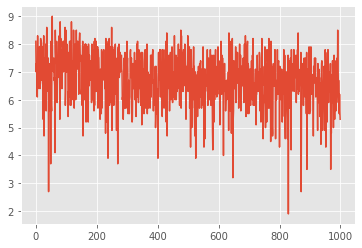

In [190]:
plt.plot(imdb.Rating);

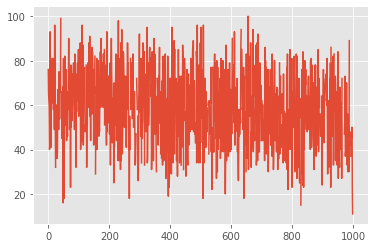

In [191]:
plt.plot(imdb.Metascore);

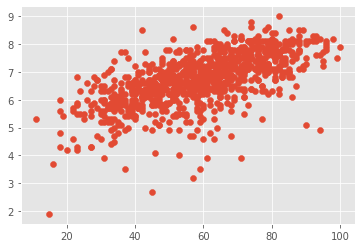

In [192]:
plt.scatter(imdb.Metascore, imdb.Rating)
plt.show()

In [193]:
imdb['Rating'].corr(imdb['Revenue'])

0.21765389419105993

There's a weak correlation between them. Let's plot.

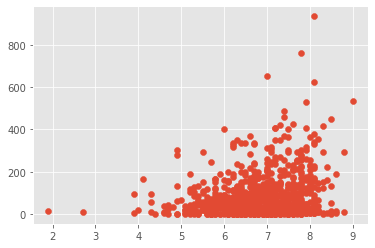

In [194]:
matplotlib.style.use('ggplot')
plt.scatter(imdb.Rating, imdb.Revenue)
plt.show()

I want to see if longer duration always results in better rating.

In [196]:
imdb['Rating'].corr(imdb['Runtime'])

0.3922142455250516

Well, meh. Let's plot this.

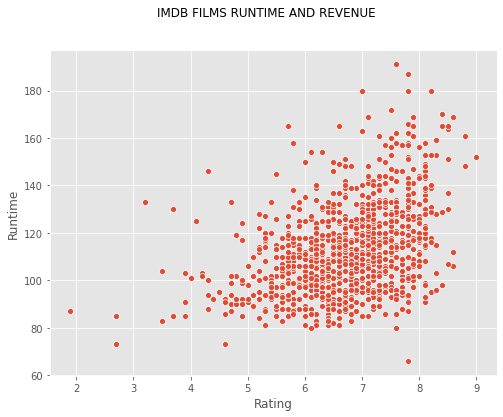

In [220]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(imdb.Rating, imdb.Runtime, ax=ax)
fig.set_tight_layout
fig.suptitle("IMDB FILMS RUNTIME AND REVENUE")
plt.show()

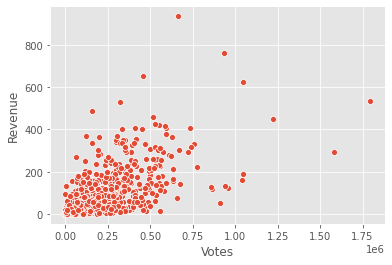

In [222]:
# b,ax = plt.subplots()
# ax.set(xscale="log")
sns.scatterplot(imdb.Votes, imdb.Revenue)
plt.show()

In [0]:
# b, ax = plt.subplots(figsize=(8, 6))
# ax.set(xscale="log")
# sns.scatterplot(imdb.Rating, imdb.Revenue)
# plt.show()

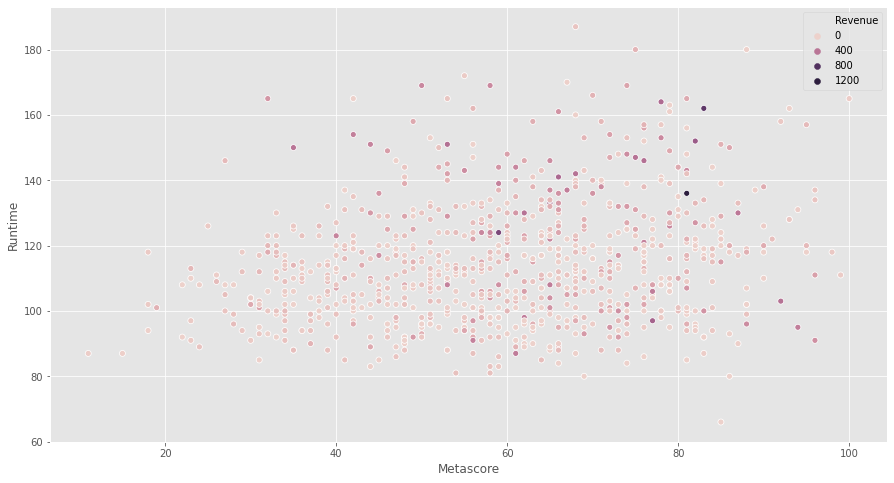

In [231]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.scatterplot(imdb.Metascore,imdb.Runtime,imdb.Revenue);